## Title

# Exploratory Data Analysis

### Description:

In this notebook we will have a first look to the initial dataset, join them in order to work with the full dataset. Next we will perform the Exploratory Data Analysis in order to look up for insights.

### Authors:

#### Hugo Cesar Octavio del Sueldo
#### Jose Lopez Galdon

### Date:
15/01/2021
### Version:
1.0

## Load pySpark

First of all, we will create the sparkContext and we will create the RDD from our files downloaded from the official website.

In [1]:
    # Findspark to locate the spark in the system
#import findspark
#findspark.init()

    # Initialize the spark context
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

    # Due to we are going to work with sparkSQL we will introduce the sparksql context
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.window import Window
spark = SparkSession.builder.master("local[*]").getOrCreate()

    # Visualitation
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

Now, we will create objects with the file path

In [2]:
data_movies = "../data/01_raw/movies.csv"
data_ratings = "../data/01_raw/ratings.csv"

### Movies dataset

**`spark.read`**: It is necesary to load the csv file.
- format("csv"): Means the format of the file.

- option("sep", ","): It establish the kind of spearator, in this case ','.

- option("inferSchema", "true"): We set spark to infer the type of schema.

- option("header", "true"): We say to spark that the file has a header.

- load(f'{datos_movies}'): Path file.

This code was written in Scala.

In [3]:
raw_movies = spark.read.format("csv") \
                       .option("sep", ",") \
                       .option("inferSchema", "true") \
                       .option("header", "true") \
                       .load(f'{data_movies}')
print(type(raw_movies))

<class 'pyspark.sql.dataframe.DataFrame'>


#### View data

Now we have our data file loaded into the raw_movies DataFrame.

Without getting into *Spark transformations and actions*, the most basic thing we can do to check that we got our DF contents right is to check the first few entries in our data. We can also count() the number of lines loaded from the file into the DF.

In [4]:
     # The first 5 observations with take function
raw_movies.take(5)

[Row(movieId=1, title='Toy Story (1995)', genres='Adventure|Animation|Children|Comedy|Fantasy'),
 Row(movieId=2, title='Jumanji (1995)', genres='Adventure|Children|Fantasy'),
 Row(movieId=3, title='Grumpier Old Men (1995)', genres='Comedy|Romance'),
 Row(movieId=4, title='Waiting to Exhale (1995)', genres='Comedy|Drama|Romance'),
 Row(movieId=5, title='Father of the Bride Part II (1995)', genres='Comedy')]

In [5]:
     # Count the number of observation
raw_movies.count()

58098

To see the result in more interactive manner (rows under the columns), we can use the show operation

In [6]:
raw_movies.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [7]:
    # Show the schema
raw_movies.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



As we can see, it shows us each column (by name, according to the file header) and its type.

### Ratings dataset

**`spark.read`**: It is necesary to load the csv file.
- format("csv"): Means the format of the file.

- option("sep", ","): It establish the kind of spearator, in this case ','.

- option("inferSchema", "true"): We set spark to infer the type of schema.

- option("header", "true"): We say to spark that the file has a header.

- load(f'{datos_movies}'): Path file.

This code was written in Scala.

In [8]:
raw_ratings = spark.read.format("csv") \
                        .option("sep", ",") \
                        .option("inferSchema", "true") \
                        .option("header", "true") \
                        .load(f'{data_ratings}')
print(type(raw_ratings))

<class 'pyspark.sql.dataframe.DataFrame'>


#### View data

In [9]:
    # The first 5 observations with take function
raw_ratings.take(5)

[Row(userId=1, movieId=307, rating=3.5, timestamp=1256677221),
 Row(userId=1, movieId=481, rating=3.5, timestamp=1256677456),
 Row(userId=1, movieId=1091, rating=1.5, timestamp=1256677471),
 Row(userId=1, movieId=1257, rating=4.5, timestamp=1256677460),
 Row(userId=1, movieId=1449, rating=4.5, timestamp=1256677264)]

In [10]:
    # Count the number of observation
raw_ratings.show()

+------+-------+------+----------+
|userId|movieId|rating| timestamp|
+------+-------+------+----------+
|     1|    307|   3.5|1256677221|
|     1|    481|   3.5|1256677456|
|     1|   1091|   1.5|1256677471|
|     1|   1257|   4.5|1256677460|
|     1|   1449|   4.5|1256677264|
|     1|   1590|   2.5|1256677236|
|     1|   1591|   1.5|1256677475|
|     1|   2134|   4.5|1256677464|
|     1|   2478|   4.0|1256677239|
|     1|   2840|   3.0|1256677500|
|     1|   2986|   2.5|1256677496|
|     1|   3020|   4.0|1256677260|
|     1|   3424|   4.5|1256677444|
|     1|   3698|   3.5|1256677243|
|     1|   3826|   2.0|1256677210|
|     1|   3893|   3.5|1256677486|
|     2|    170|   3.5|1192913581|
|     2|    849|   3.5|1192913537|
|     2|   1186|   3.5|1192913611|
|     2|   1235|   3.0|1192913585|
+------+-------+------+----------+
only showing top 20 rows



In [11]:
    # Show the schema 
raw_ratings.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- movieId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)



In [12]:
     # Count the number of observation    
raw_ratings.count()

27753444

### Join datasets

In order to continue with the exploration, we will merge both datasets.

In [13]:
    # Join both the data frames to add movie data into ratings
movie_ratings = raw_ratings.join(other=raw_movies, on=["movieId"], how="left")

As we can see above, we have our new dataset ready to perform the EDA.

***

***

## Sparcity

In [14]:
# Count the total number of ratings in the dataset
numerator = movie_ratings.select("rating").count()

# Count the number of distinct Id's
num_users = movie_ratings.select("userId").distinct().count()
num_items = movie_ratings.select("movieId").distinct().count()

# Set the denominator equal to the number of users multiplied by the number of items
denominator = num_users * num_items

# Divide the numerator by the denominator
sparsity = (1.0 - (numerator * 1.0)/ denominator) * 100
print("The movie_ratings dataframe is ", "%.2f" % sparsity + "% empty.")

The movie_ratings dataframe is  99.82% empty.


At this point you will be think what is Sparcity? well this is answer in the theory part (`00_THEORY`). Anyway, we will explain a breaf summary about it.

In a real world setting, the vast majority of movies receive very few or even no ratings at all by users. A variable with sparse data is one in which a relatively high percentage of the variable's cells do not contain actual data. Such "empty," or NA, values take up storage space in the file.

***

***

## EDA

In this part, we will perform the EDA, so we can see more details of these dataset. First of all, we will look up the first and last rows, get the data shape, schema, dictionary of the variables... Also we will study if we have to drop some variables, study NaN and duplicated data.

### Dictionary

- `movieId`: Identification number for the movie.
- `userId`: Identification number for the user.
- `rarting`: Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).
- `timestamp`: Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.
- `title`: Title and year of the movie.
- `genres`: Genres are a pipe-separated list.

### Data structure

In [15]:
    # Show the dataset
movie_ratings.show()

+-------+------+------+----------+--------------------+--------------------+
|movieId|userId|rating| timestamp|               title|              genres|
+-------+------+------+----------+--------------------+--------------------+
|    307|     1|   3.5|1256677221|Three Colors: Blu...|               Drama|
|    481|     1|   3.5|1256677456|   Kalifornia (1993)|      Drama|Thriller|
|   1091|     1|   1.5|1256677471|Weekend at Bernie...|              Comedy|
|   1257|     1|   4.5|1256677460|Better Off Dead.....|      Comedy|Romance|
|   1449|     1|   4.5|1256677264|Waiting for Guffm...|              Comedy|
|   1590|     1|   2.5|1256677236|Event Horizon (1997)|Horror|Sci-Fi|Thr...|
|   1591|     1|   1.5|1256677475|        Spawn (1997)|Action|Adventure|...|
|   2134|     1|   4.5|1256677464|Weird Science (1985)|Comedy|Fantasy|Sc...|
|   2478|     1|   4.0|1256677239|¡Three Amigos! (1...|      Comedy|Western|
|   2840|     1|   3.0|1256677500|     Stigmata (1999)|      Drama|Thriller|

Here we can see the first 20 rows of our dataset. Genre column has various genres associated with that movie but we need to process on each genre separately and hence we will split the genre with the ‘|’ operator and then use explode so that every distinct genre will be in their own row. This will ignore null or empty genres if present in the dataset and if for some reason you want them to persist then you can go for explode_outer as it will also store null or empty values.

We will create a schema to ensure that each column has the desired data type as we need. 

In [16]:
    # Show the schema
movie_ratings.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- rating: double (nullable = true)
 |-- timestamp: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



In [17]:
    # Another way to see the column names
movie_ratings.columns

['movieId', 'userId', 'rating', 'timestamp', 'title', 'genres']

In [18]:
    # Data shape
movie_ratings.count()

27753444

### Data describe

In [19]:
movie_ratings.describe().show()

+-------+------------------+------------------+------------------+--------------------+--------------------+------------------+
|summary|           movieId|            userId|            rating|           timestamp|               title|            genres|
+-------+------------------+------------------+------------------+--------------------+--------------------+------------------+
|  count|          27753444|          27753444|          27753444|            27753444|            27753444|          27753444|
|   mean| 18487.99983414671|141942.01557064414|3.5304452124932677|1.1931218549319255E9|                null|              null|
| stddev|35102.625247468335|   81707.400091494| 1.066352750231989|2.1604822852234188E8|                null|              null|
|    min|                 1|                 1|               0.5|           789652004|"""Great Performa...|(no genres listed)|
|    max|            193886|            283228|               5.0|          1537945149|     줄탁동시 (2012)|

Here we can see that we have 27 Millions of rows in our dataframe. Furthermore, we can observe that it has 193886 movies and 283228 different users. This lead as to conclude that we have possible nulls and/or the users just publish 100 ratings more or less. The lowest rating provided to the movies is 0.5 and the max is 5 points, the average rating is 3.5 points out of 5 with a SD of 1 point.

### Count Null's values

In [20]:
movie_ratings.select([count(when(col(c).isNull(), c)).alias(c) for c in 
           movie_ratings.columns]).show()

+-------+------+------+---------+-----+------+
|movieId|userId|rating|timestamp|title|genres|
+-------+------+------+---------+-----+------+
|      0|     0|     0|        0|    0|     0|
+-------+------+------+---------+-----+------+



As we can see above, there are not null's in our spark dataframe. Next, we will analyze the genres.

***

### Genres analysis

Here we will perform the `genres` column analysis in order to study which of the different genres are most rated, better rated or their distributions...

In [21]:
    # Lets split the data by |
df_genres_split = movie_ratings.withColumn("genres", explode(split("genres", "[|]")))
df_genres_split.show()

+-------+------+------+----------+--------------------+---------+
|movieId|userId|rating| timestamp|               title|   genres|
+-------+------+------+----------+--------------------+---------+
|    307|     1|   3.5|1256677221|Three Colors: Blu...|    Drama|
|    481|     1|   3.5|1256677456|   Kalifornia (1993)|    Drama|
|    481|     1|   3.5|1256677456|   Kalifornia (1993)| Thriller|
|   1091|     1|   1.5|1256677471|Weekend at Bernie...|   Comedy|
|   1257|     1|   4.5|1256677460|Better Off Dead.....|   Comedy|
|   1257|     1|   4.5|1256677460|Better Off Dead.....|  Romance|
|   1449|     1|   4.5|1256677264|Waiting for Guffm...|   Comedy|
|   1590|     1|   2.5|1256677236|Event Horizon (1997)|   Horror|
|   1590|     1|   2.5|1256677236|Event Horizon (1997)|   Sci-Fi|
|   1590|     1|   2.5|1256677236|Event Horizon (1997)| Thriller|
|   1591|     1|   1.5|1256677475|        Spawn (1997)|   Action|
|   1591|     1|   1.5|1256677475|        Spawn (1997)|Adventure|
|   1591| 

First, we have to understand how withColumn works, withColumn is used to create a new column in the dataframe with some condition or just populating constant values. If column exists already as in this case (genre column) we can populate it with some condition passed alongside it.

Once we have the data in the correct we can show which of the genres is the most popular.

In [22]:
    # Count the different genres
df_genres_split.groupBy("genres").count().sort("count").show()

+------------------+--------+
|            genres|   count|
+------------------+--------+
|(no genres listed)|   18389|
|         Film-Noir|  272742|
|       Documentary|  345471|
|           Western|  542424|
|              IMAX| 1102179|
|           Musical| 1109674|
|               War| 1426112|
|         Animation| 1803041|
|            Horror| 2070791|
|           Mystery| 2210388|
|          Children| 2381124|
|           Fantasy| 3118549|
|             Crime| 4631581|
|            Sci-Fi| 4740208|
|           Romance| 5078478|
|         Adventure| 6452309|
|          Thriller| 7489628|
|            Action| 8214956|
|            Comedy| 9999184|
|             Drama|12191048|
+------------------+--------+



We can see that we have 18389 movies with *(no genres listed)*, also we can see that the most common genre is *Drama*, follow by *Comedy* and *Action*. 

For further information we will explore those movies without genres listed:

In [23]:
    # Filter the movies by "(no genres listed)"
df_genres_split.filter(df_genres_split.genres == "(no genres listed)").show()

+-------+------+------+----------+--------------------+------------------+
|movieId|userId|rating| timestamp|               title|            genres|
+-------+------+------+----------+--------------------+------------------+
| 166024|    14|   4.5|1497536861|     Whiplash (2013)|(no genres listed)|
| 122896|    75|   1.5|1511888856|Pirates of the Ca...|(no genres listed)|
| 125958|   119|   5.0|1474471558|Stephen Fry In Am...|(no genres listed)|
| 138212|   134|   4.0|1485104419|     Spectral (2016)|(no genres listed)|
| 141866|   173|   3.5|1484060054|   Green Room (2015)|(no genres listed)|
| 130060|   176|   3.0|1499892811|Des fleurs pour A...|(no genres listed)|
| 147942|   176|   4.0|1535836533|       Room 8 (2013)|(no genres listed)|
| 155927|   176|   3.5|1499880225|    Vdrebezgi (2011)|(no genres listed)|
| 162290|   176|   2.0|1499891266|         Lift (2006)|(no genres listed)|
| 166562|   176|   4.5|1499893111|Panfilov's 28 Men...|(no genres listed)|
| 179111|   214|   4.0|15

There are some of these films that are known as *Pirates of the Caribean* with no genre, so probably they are NaN (or database errors) but we do not need care about that becouse ALS algorithm is prepared to work with that kind of NaN.

#### Genres describe

In [24]:
df_genres_split.groupBy("genres").agg(avg("rating"), min("rating"), max("rating"), \
                                    stddev("rating"), stddev("rating")/avg("rating")) \
                                    .withColumnRenamed("(stddev_samp(rating) / avg(rating))", "Variation Coefficient") \
                                    .show()

+------------------+------------------+-----------+-----------+-------------------+---------------------+
|            genres|       avg(rating)|min(rating)|max(rating)|stddev_samp(rating)|Variation Coefficient|
+------------------+------------------+-----------+-----------+-------------------+---------------------+
|             Crime| 3.683522430029832|        0.5|        5.0| 1.0153457266291848|   0.2756453220839928|
|           Romance| 3.541861853098507|        0.5|        5.0| 1.0514365272045756|   0.2968598355367117|
|          Thriller|3.5188010672893233|        0.5|        5.0|  1.042630316405828|  0.29630271688220466|
|         Adventure|3.5132836167641694|        0.5|        5.0| 1.0727885305080846|  0.30535210006647634|
|             Drama|3.6763707271105814|        0.5|        5.0| 1.0044495225847434|   0.2732176913437083|
|               War| 3.796596971345869|        0.5|        5.0| 0.9979888474744607|   0.2628640477265829|
|       Documentary|3.7108599564073397|       

Above, we can observe that the most rating genre is *Film-Noir* with 3.8 on average, follow by *War, Documentary, Crime* and least *Drama* with 3.71, 3.68 and 3.67, respectively, on average.Plus, the movie with the highest standard deviation are the *no genres listed* follow by Horror movies with 1.14. Due to this, the genred with the highest Variation coefficient are the *no genres listed* and *horror* movies. 

#### Genres plots

##### Bar plots

If we want to plot the DF we have to transform our spark dataframes into Pandas object.

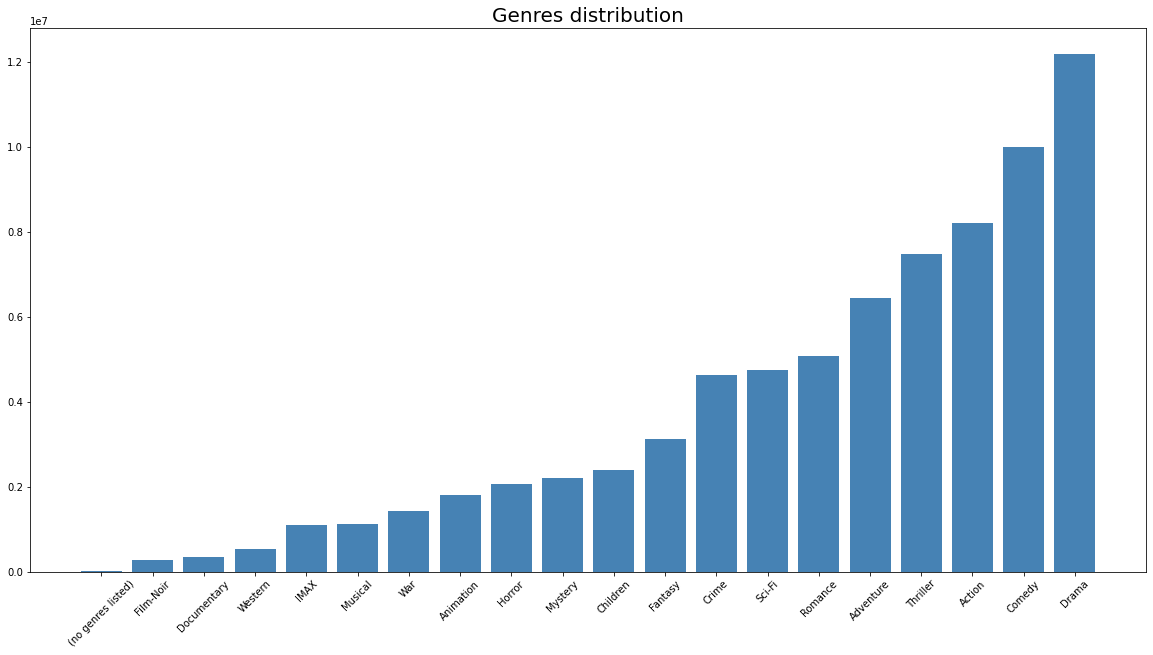

In [25]:
# COUNT GENRES
    # First, we group by genres, count them and sort, and transform into a pandas object
df_genres_split_grouped = df_genres_split.groupBy("genres").count().sort("count").toPandas()

    # Secondly, we create the plot
plt.figure(figsize=(20,10))
plt.bar(df_genres_split_grouped["genres"], df_genres_split_grouped["count"], color="steelblue")
plt.title("Genres distribution", fontsize=20)
plt.xticks(rotation=45)
plt.show()

As we showed before, *Film-Noir* is the genre with highest rating on average we will like to plot his distribution in order to study its behavior.

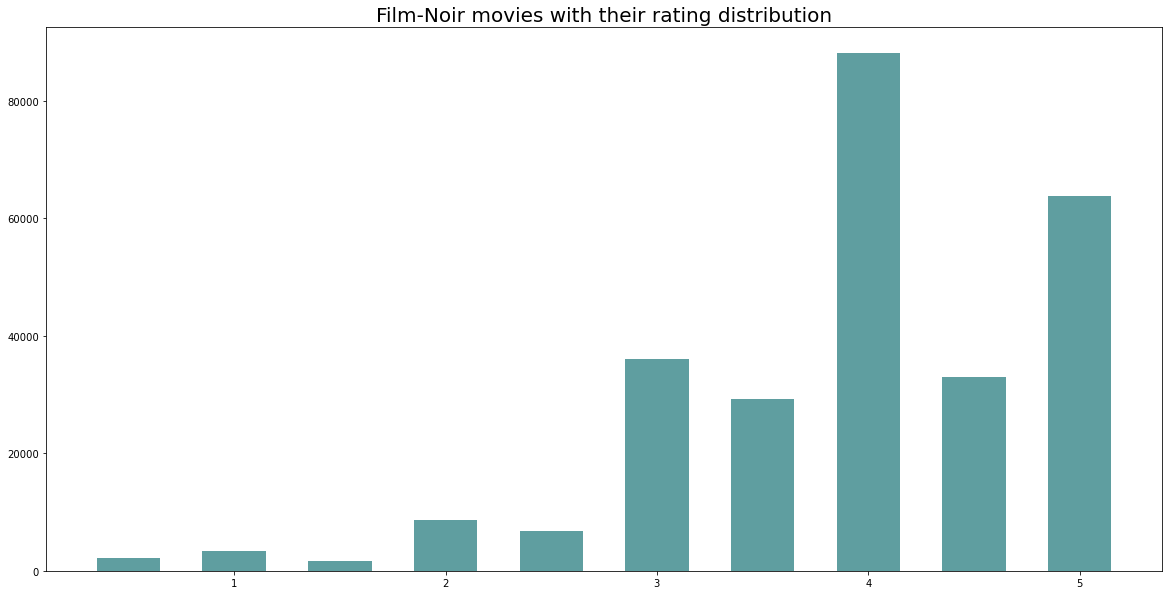

In [26]:
# RATING DISTRIBUTION FILM-NOIR
    # First, we create our pandas object
df_filmnoir = df_genres_split.filter(df_genres_split.genres == "Film-Noir").select("genres","rating")
df_filmnoir_rating = df_filmnoir.groupBy("rating").count().toPandas()

    # Parametrize the plot
df_plot = df_filmnoir_rating
color = "cadetblue"
bin_width = 0.3

    # Create a bar plot
plt.figure(figsize=(20,10))
plt.bar(df_plot["rating"], df_plot["count"], color=color, width=bin_width)
plt.title("Film-Noir movies with their rating distribution", fontsize=20)
plt.show()

We can observe that the majority of the ratings are very good (4 out of 5). Next, they don't have low ratings between 1 and 2. Finally, the distribution is concentrated between 3 and 5 so it has left-skewed.

Now, we will plot the worst genres rated to show the difference between Film-Noir movies and Horror movies.

Our initial hypothesis is the distribution will not change as much as the Film-Noir movies because on average they are actually similar

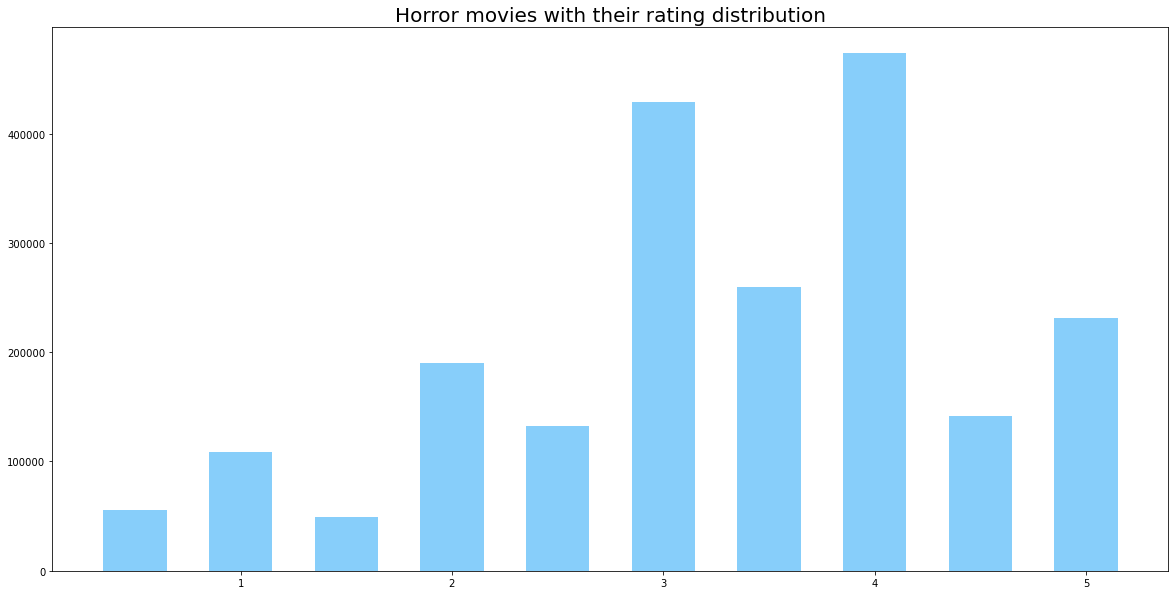

In [27]:
# RATING DISTRIBUTION HORROR MOVIES
df_horror = df_genres_split.filter(df_genres_split.genres == "Horror").select("genres","rating")
df_horror_rating = df_horror.groupBy("rating").count().toPandas()

    # Parametrize the plot
df_plot = df_horror_rating
color = "lightskyblue"
bin_width = 0.3

    # Create a bar plot
plt.figure(figsize=(20,10))
plt.bar(df_plot["rating"], df_plot["count"], color=color, width=bin_width)
plt.title("Horror movies with their rating distribution", fontsize=20)
plt.show()

As we said before, the majority of the distribution is in the range of 3 and 5 with more 3's than the Film-Noir movies. Plus, it has less 5's ratings and an increase in the lowest puntuation than the Film-Noir movies.

##### Box-plots

Finally, we will plot the boxplot distribution of the genres, in order to study the minimum, first quartile, median, third quartile, and maximum.

Due to the big ammount of data, we can not plot all the genres of each movie, because we will create a pandas object to heavy... So in order to avoid this problem, we will rank the genres of each movie, so we will only have one genre per movie.

In [28]:
    # If use all the genres...
df_genres_split.select("genres","rating").count()

75198276

As we can see above, 75M rows is too much, so we will reduce this amount of data:

In [29]:
    # Here we will create a new column, called rank in order to list the different genres of one film
df_ranked_genres = df_genres_split.withColumn("rank", row_number().over(Window.partitionBy("userId","title").orderBy("rating")))
df_ranked_genres.show()

+-------+------+------+----------+--------------------+---------+----+
|movieId|userId|rating| timestamp|               title|   genres|rank|
+-------+------+------+----------+--------------------+---------+----+
|   4721|     4|   3.5|1113796477|American Outlaws ...|   Action|   1|
|   4721|     4|   3.5|1113796477|American Outlaws ...|   Comedy|   2|
|   4721|     4|   3.5|1113796477|American Outlaws ...|  Western|   3|
|   4022|     4|   0.5|1113765941|    Cast Away (2000)|    Drama|   1|
|    435|     4|   2.0|1115782018|    Coneheads (1993)|   Comedy|   1|
|    435|     4|   2.0|1115782018|    Coneheads (1993)|   Sci-Fi|   2|
|  44191|     4|   5.0|1145937408|V for Vendetta (2...|   Action|   1|
|  44191|     4|   5.0|1145937408|V for Vendetta (2...|   Sci-Fi|   2|
|  44191|     4|   5.0|1145937408|V for Vendetta (2...| Thriller|   3|
|  44191|     4|   5.0|1145937408|V for Vendetta (2...|     IMAX|   4|
|  89804|    15|   3.0|1370976769|Ides of March, Th...|    Drama|   1|
|    3

We will achieve this by using window operations in spark, which is widely used in development. We will create a window where movieId and title is same, which will club these together and will store them in the same partition if they contain same values for movieId and title and order them by rating (Although in real-life scenarios we might get different timestamps and we have to order them by that but here timestamps are same so we can order them by rating or timestamp). And with the help of row number, we will give a serial numbering to it and then we can pick the lowest or the highest value of the row number but do that we have persisted these rank values and with column is used for that. It will create a new column named rank with increasing serial values.

In [30]:
    # Lets filter by the first gnere of each film
df_first_rank_genres = df_ranked_genres.filter(df_ranked_genres.rank == 1)
df_first_rank_genres.show()

+-------+------+------+----------+--------------------+---------+----+
|movieId|userId|rating| timestamp|               title|   genres|rank|
+-------+------+------+----------+--------------------+---------+----+
|   4721|     4|   3.5|1113796477|American Outlaws ...|   Action|   1|
|   4022|     4|   0.5|1113765941|    Cast Away (2000)|    Drama|   1|
|    435|     4|   2.0|1115782018|    Coneheads (1993)|   Comedy|   1|
|  44191|     4|   5.0|1145937408|V for Vendetta (2...|   Action|   1|
|  89804|    15|   3.0|1370976769|Ides of March, Th...|    Drama|   1|
|    365|    15|   3.5|1370809370|Little Buddha (1993)|    Drama|   1|
|    196|    18|   3.0| 845061636|      Species (1995)|   Horror|   1|
|   3033|    26|   5.0|1225240325|   Spaceballs (1987)|   Comedy|   1|
|   3578|    34|   5.0|1472946547|    Gladiator (2000)|   Action|   1|
|   3996|    36|   3.0|1529363149|Crouching Tiger, ...|   Action|   1|
|   1884|    42|   4.0|1251234856|Fear and Loathing...|Adventure|   1|
|   12

Above we only have one genre per each film, so this will reduce our plot data...

In [31]:
df_first_rank_genres.count()

27752817

In [32]:
    # Lets cast ratings to float type
df_first_rank_genres = df_first_rank_genres.withColumn("rating", df_first_rank_genres["rating"].cast(FloatType()))

    # Show the schema to check
df_first_rank_genres.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- rating: float (nullable = true)
 |-- timestamp: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- rank: integer (nullable = true)



As we know, the original dataset (`df_first_rank_genres`) has 27M of rows, this amount of data is too heavy for a pandas object, so we will take a sample of 300k in order to plot the boxplot.

In [33]:
    # Substract a sample using sample() function without replacement
df = df_first_rank_genres.select("genres", "rating").sample(False, 0.01, seed=1322).persist()

    # Count values
df.count()

278259

Now we can see, that we have a 300k size, so we are ready to plot!

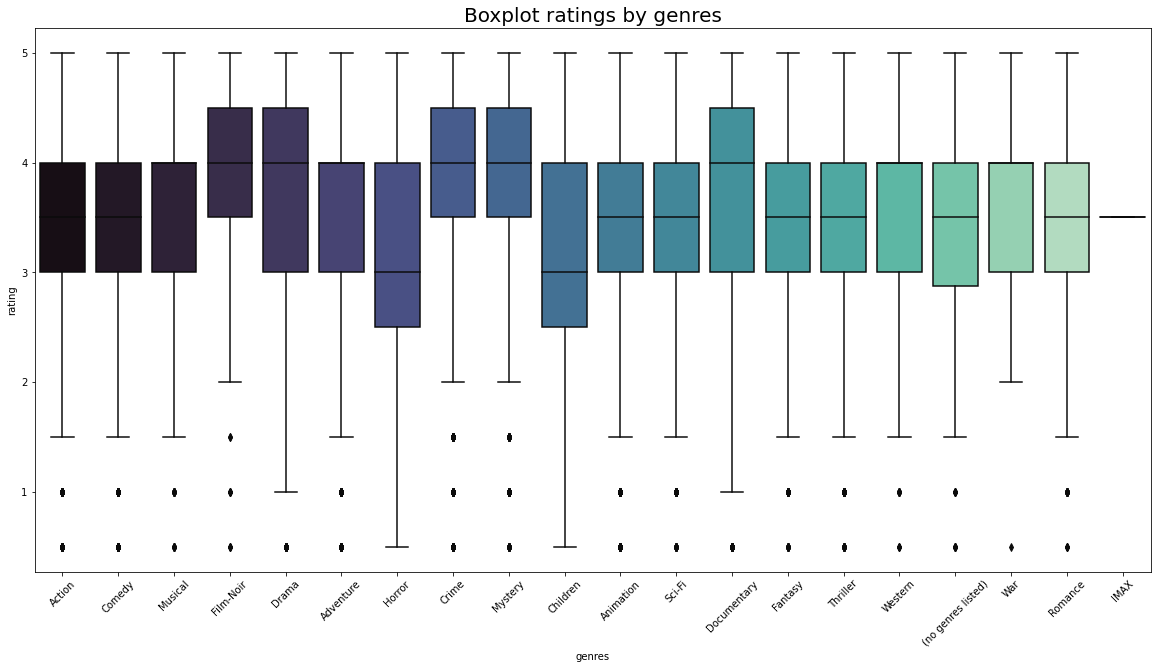

In [34]:
# BOXPLOT RATINGS
    # Parametrize the plot
data_plot = df.toPandas()

    # Plot
plt.figure(figsize=(20,10))
sns.boxplot(x="genres", y="rating", data=data_plot, palette="mako")
plt.title("Boxplot ratings by genres", fontsize=20)
plt.xticks(rotation=45);

As we can see in our sample (the full data boxplot could change) the betst rated genres are *Film-Noir*, *Drama*, *Crime* and *Mistery*. Usually the min rate of this genres is 2 points out of 5 but the other genres ususally have 1.5 points of minimum score. *Children* and *Horror* have big variability because they have the major distance between the max and the min values, so this type of films likes as much as dislikes.

***

### Movies analysis

#### Most popular movies

To get the most popular movies, we are looking for the movies with the highest number of ratings (we use the number of ratings as a proxy for the number of views). To do this, we will perform the following transformations on the movie_ratings DataFrame:

- group by title

- count the number of users (userId) associated with each movie

- rename this column to num_ratings

- sort by num_ratings in descending order

In the next cell, we perform these transformations in pySpark and store the DataFrame as most_popular.

In [35]:
most_popular = movie_ratings\
    .groupBy("title")\
    .agg(count("userId"))\
    .withColumnRenamed("count(userId)", "num_ratings")\
    .sort(desc("num_ratings"))

The DataFrame methods we have used here are:

- groupBy - groups the DataFrame by the given column

- agg - allows us to perform an aggregate calculation on grouped data (this can be a built-in aggregation function such as count or a user defined function)

- withColumnRenamed - renames an existing column with a new column name

- sort - sorts by the specified column(s)

In [36]:
most_popular.show(10)

+--------------------+-----------+
|               title|num_ratings|
+--------------------+-----------+
|Shawshank Redempt...|      97999|
| Forrest Gump (1994)|      97040|
| Pulp Fiction (1994)|      92406|
|Silence of the La...|      87899|
|  Matrix, The (1999)|      84545|
|Star Wars: Episod...|      81815|
|Jurassic Park (1993)|      76451|
|Schindler's List ...|      71516|
|   Braveheart (1995)|      68803|
|    Toy Story (1995)|      68469|
+--------------------+-----------+
only showing top 10 rows



Here we can see the first 10 movies sorted by number of ratings. So, the most rating film is Shawshank Redemption follow by Forrest Gump one of the most famous films ever created.

#### Movies not rated yet

In [37]:
# create a temp SQL table view for easier query
raw_movies.createOrReplaceTempView("movies")
raw_ratings.createOrReplaceTempView("ratings")
print('List movies that are not rated yet: ')
# SQL query (NOTE: WHERE ... NOT IN ... == ... LEFT JOIN ... WHERE ... IS NULL)
# Approach 1
spark.sql(
    "SELECT movieId, title "
    "FROM movies "
    "WHERE movieId NOT IN (SELECT distinct(movieId) FROM ratings)"
).show(10)
# Approach 2
# spark.sql(
#     "SELECT m.movieId, m.title "
#     "FROM movies m LEFT JOIN ratings r ON m.movieId=r.movieId "
#     "WHERE r.movieId IS NULL"
# ).show(10)

List movies that are not rated yet: 
+-------+--------------------+
|movieId|               title|
+-------+--------------------+
|  25817|Break of Hearts (...|
|  26361|Baby Blue Marine ...|
|  27153|Can't Be Heaven (...|
|  27433|        Bark! (2002)|
|  31945|Always a Bridesma...|
|  52696|Thousand and One ...|
|  58209|Alex in Wonder (S...|
|  60234|   Shock, The (1923)|
|  69565|Bling: A Planet R...|
|  69834|       Agency (1980)|
+-------+--------------------+
only showing top 10 rows



#### Movies by year

At this stage, we are interested to learn about the distribution of the years by movie. To do so, we will extract the year from the title and then perform a histogram to see their distribution.

In [38]:
df_title_year = movie_ratings \
                .withColumn("year", regexp_extract("title", "\((\d+)\)", 0))
df_title_year.show()

+-------+------+------+----------+--------------------+--------------------+------+
|movieId|userId|rating| timestamp|               title|              genres|  year|
+-------+------+------+----------+--------------------+--------------------+------+
|    307|     1|   3.5|1256677221|Three Colors: Blu...|               Drama|(1993)|
|    481|     1|   3.5|1256677456|   Kalifornia (1993)|      Drama|Thriller|(1993)|
|   1091|     1|   1.5|1256677471|Weekend at Bernie...|              Comedy|(1989)|
|   1257|     1|   4.5|1256677460|Better Off Dead.....|      Comedy|Romance|(1985)|
|   1449|     1|   4.5|1256677264|Waiting for Guffm...|              Comedy|(1996)|
|   1590|     1|   2.5|1256677236|Event Horizon (1997)|Horror|Sci-Fi|Thr...|(1997)|
|   1591|     1|   1.5|1256677475|        Spawn (1997)|Action|Adventure|...|(1997)|
|   2134|     1|   4.5|1256677464|Weird Science (1985)|Comedy|Fantasy|Sc...|(1985)|
|   2478|     1|   4.0|1256677239|¡Three Amigos! (1...|      Comedy|Western|

In [39]:
print(type(df_title_year))

<class 'pyspark.sql.dataframe.DataFrame'>


In [40]:
df_title_year_rating = df_title_year.select("year").distinct()
df_title_year_rating.show()

+------+
|  year|
+------+
|(1976)|
|(1926)|
|(2017)|
|(1992)|
|(1963)|
|(2008)|
|(1993)|
|(1905)|
|(1940)|
|(1975)|
|(1901)|
|(1939)|
|(1953)|
|(1955)|
|(1883)|
|(1991)|
|(1892)|
|(1982)|
|(1951)|
|(2012)|
+------+
only showing top 20 rows



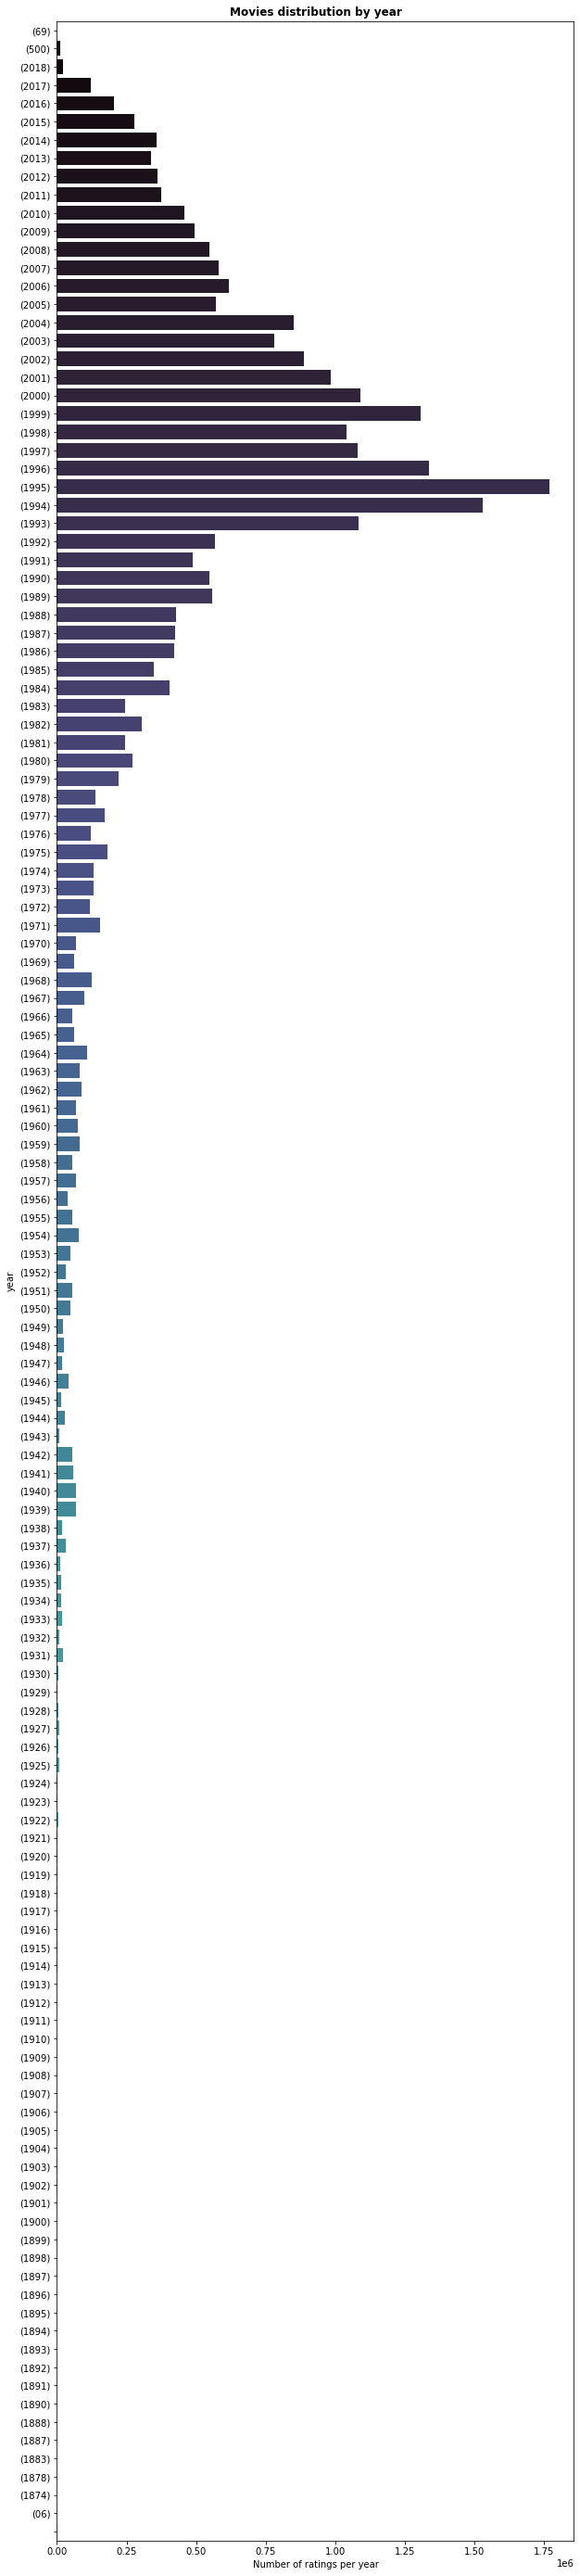

In [41]:
    # MOVIES DISTRIBUTION BY YEAR
df_title_year_rating = df_title_year.select("year","rating")
df_title_year_rating_group = df_title_year_rating.groupBy("year") \
                                                .count() \
                                                .sort(desc("year")) \
                                                .toPandas()

fig, (ax) = plt.subplots(1, figsize=(10, 50))

    # Parametrize the plot
df_plot = df_title_year_rating_group

    #make barplot
ax = sns.barplot(x=df_plot["count"],
                 y=df_plot["year"],
                 data=df_plot, 
                 palette="mako")
    #set labels
ax.set_xlabel('Number of ratings per year')
ax.set_title("Movies distribution by year", weight='bold');

Above, we can visualize that the majority of the movies are from 1995 so it has more than 20 years of antiquity. In addition to this, we can see the oldest movie are from 1874 and the newest are from 2018.

***

### Users analysis

In [42]:
    # Group data by user_id, count ratings
movie_ratings.groupBy("userId") \
    .count() \
    .filter("`count` > 1") \
    .sort(col("count").desc()) \
    .show()

+------+-----+
|userId|count|
+------+-----+
|123100|23715|
|117490| 9279|
|134596| 8381|
|212343| 7884|
|242683| 7515|
|111908| 6645|
| 77609| 6398|
| 63783| 6346|
|172357| 5868|
|141955| 5810|
|158002| 5701|
|253511| 5356|
| 48470| 5257|
|183233| 5169|
| 94843| 5130|
| 73145| 5042|
| 37046| 5041|
|187986| 4951|
|  4796| 4874|
|236981| 4854|
+------+-----+
only showing top 20 rows



In this case the user with the id *123100* has rated 23715 films, this is weird because is a huge amount of films. It seems that it is a movie critic or a company.

So now, we are going to analyze this user. In this case we will get the top rated films and the worst rated films...

In [43]:
movie_ratings.where((movie_ratings.userId == "123100") & (movie_ratings.rating == "5")) \
.select("movieId", "title", "rating", "genres").show()

+-------+--------------------+------+--------------------+
|movieId|               title|rating|              genres|
+-------+--------------------+------+--------------------+
|     97|Hate (Haine, La) ...|   5.0|         Crime|Drama|
|    136|From the Journals...|   5.0|         Documentary|
|    215|Before Sunrise (1...|   5.0|       Drama|Romance|
|    306|Three Colors: Red...|   5.0|               Drama|
|    307|Three Colors: Blu...|   5.0|               Drama|
|    529|Searching for Bob...|   5.0|               Drama|
|    530|  Second Best (1994)|   5.0|               Drama|
|    670|World of Apu, The...|   5.0|               Drama|
|    723|  Two Friends (1986)|   5.0|               Drama|
|    746|Force of Evil (1948)|   5.0|           Film-Noir|
|    854|Ballad of Narayam...|   5.0|               Drama|
|    896|Wild Reeds (Les r...|   5.0|               Drama|
|    907|Gay Divorcee, The...|   5.0|Comedy|Musical|Ro...|
|    913|Maltese Falcon, T...|   5.0|   Film-Noir|Myster

Above we can see the top rated films for the user *123100*, we can conclude that this user likes drama films like *La Haine* a 1995 French independent black-and-white drama film written, co-edited, and directed by Mathieu Kassovitz.

In [44]:
movie_ratings.where((movie_ratings.userId == "123100") & (movie_ratings.rating == "0.5")) \
.select("movieId", "title", "rating", "genres").show()

+-------+--------------------+------+--------------------+
|movieId|               title|rating|              genres|
+-------+--------------------+------+--------------------+
|    157|Canadian Bacon (1...|   0.5|          Comedy|War|
|    173|  Judge Dredd (1995)|   0.5| Action|Crime|Sci-Fi|
|    193|    Showgirls (1995)|   0.5|               Drama|
|    315|Specialist, The (...|   0.5|Action|Drama|Thri...|
|    544|Striking Distance...|   0.5|        Action|Crime|
|    548|Terminal Velocity...|   0.5|Action|Mystery|Th...|
|    704|   Quest, The (1996)|   0.5|    Action|Adventure|
|   1062|Sunchaser, The (1...|   0.5|               Drama|
|   2188|           54 (1998)|   0.5|               Drama|
|   3579|I Dreamed of Afri...|   0.5|               Drama|
|   3710|Action Jackson (1...|   0.5|Action|Comedy|Cri...|
|   4367|Lara Croft: Tomb ...|   0.5|    Action|Adventure|
|   4699| Original Sin (2001)|   0.5|Drama|Romance|Thr...|
|   5471|      Perfect (1985)|   0.5|       Drama|Romanc

In this sample, we can conclude that this user do not like action movies such as Judge Dredd a 1995 American science fiction action film, based on the comic book character of the same name, directed by Danny Cannon, produced by Edward R. Pressman, Charles Lippincott and Beau E. L. Marks, and written by William Wisher Jr. and Steven E. de Souza. 

Find out the count of all the movies rated by their genre for a specific user.

In [45]:
df_first_rank_genres.filter(df_first_rank_genres.userId == "123100") \
            .groupBy(df_first_rank_genres.genres) \
            .count() \
            .show()

+------------------+-----+
|            genres|count|
+------------------+-----+
|             Crime| 1465|
|           Romance|  100|
|          Thriller|  260|
|         Adventure|  912|
|             Drama| 8020|
|               War|   38|
|       Documentary| 2136|
|           Fantasy|  122|
|           Mystery|  125|
|           Musical|   58|
|         Animation|  583|
|         Film-Noir|   36|
|(no genres listed)| 1075|
|            Horror| 1029|
|           Western|  125|
|            Comedy| 4815|
|          Children|  240|
|            Action| 2430|
|            Sci-Fi|  134|
+------------------+-----+



In [46]:
sc.stop()

***

***